In [1]:
import numpy as np

# Estados quanticos 

In [12]:
# Qubit no estado 0 
ket_psi_0 = np.array( [[1], [0]] ,complex)

ket_psi_0

array([[1.+0.j],
       [0.+0.j]])

In [13]:
# Qubit no estado 1 
ket_psi_1 = np.array( [[0], [1]] ,complex )

ket_psi_1

array([[0.+0.j],
       [1.+0.j]])

In [14]:
bra_psi_0 = ket_psi_0.T.conj()
bra_psi_0

array([[1.-0.j, 0.-0.j]])

In [15]:
bra_psi_1 = ket_psi_1.T.conj()
bra_psi_1

array([[0.-0.j, 1.-0.j]])

# Produto interno 

In [33]:
produto_interno = np.dot(bra_psi_0, ket_psi_0)
float(produto_interno.sum().real)

1.0

In [34]:
produto_interno = np.dot(bra_psi_1, ket_psi_1)
float(produto_interno.sum().real)

1.0

In [35]:
produto_interno = np.dot(bra_psi_1, ket_psi_0)
float(produto_interno.sum().real)

0.0

In [36]:
produto_interno = np.dot(bra_psi_0, ket_psi_1)
float(produto_interno.sum().real)

0.0

In [65]:
def produto_interno(vetor1, vetor2):
    """Calcula o produto interno entre dois vetores ortogonais.

    Args:
        vetor1 (np.ndarray): O primeiro vetor.
        vetor2 (np.ndarray): O segundo vetor.

    Retorna:
        float: O produto interno entre os dois vetores.
    """
    produto_interno = np.dot(vetor1.T.conj(), vetor2)
    return float(produto_interno.sum().real)

# Exemplo de uso
ket_0 = ket_psi_0
ket_1 = ket_psi_1

print(f"<0|0> = {produto_interno(ket_0, ket_0)}")
print(f"<0|1> = {produto_interno(ket_0, ket_1)}")
print(f"<1|0> = {produto_interno(ket_1, ket_0)}")
print(f"<1|1> = {produto_interno(ket_1, ket_1)}")


<0|0> = 1.0
<0|1> = 0.0
<1|0> = 0.0
<1|1> = 1.0


# Normalização dos estados.

In [66]:
ket_psi = np.array( [[(0.2+0j)*np.pi], [(0+1.1j)*np.pi]] ,complex )
bra_psi = ket_psi.T.conj()
ket_psi,bra_psi

(array([[0.62831853+0.j        ],
        [0.        +3.45575192j]]),
 array([[0.62831853-0.j        , 0.        -3.45575192j]]))

In [67]:
produto_interno(ket_psi,ket_psi)

12.3370055013617

Normalização

In [68]:
norma = produto_interno(ket_psi,ket_psi)

Novos vetores normalizado 

In [69]:
ket_psi_norm = ket_psi/np.sqrt(norma)
ket_psi_norm

array([[0.17888544+0.j        ],
       [0.        +0.98386991j]])

In [50]:
bra_psi_norm = bra_psi/np.sqrt(norma)
bra_psi_norm

array([[0.17888544-0.j        , 0.        -0.98386991j]])

Varificando se os vetores estão normalizado 

In [73]:
print(f"<> = {produto_interno(ket_psi_norm, ket_psi_norm)}")

<> = 1.0000000000000002


In [53]:
def estado_normalizado(alpha, beta):
    """Calcula um estado quântico normalizado dado amplitudes arbitrárias.

    Args:
        alpha (complex): A amplitude associada ao estado |0>.
        beta (complex): A amplitude associada ao estado |1>.

    Retorna:
        np.array[complex]: Um vetor (numpy array) com 2 elementos que representa
        um estado quântico normalizado.
    """

    ket = np.array([[alpha], [beta]], complex)
    norma = np.sqrt(np.dot(ket.T.conj(), ket).sum().real)
    return ket / norma

# Superposição

In [45]:
# Bse ortogonal
ket_psi_0 = np.array( [[1], [0]] ,complex)
ket_psi_1 = np.array( [[0], [1]] ,complex)

ket_psi  = ket_psi_0 + ket_psi_1
ket_psi


array([[1.+0.j],
       [1.+0.j]])

Amplitude de probabilidade

In [46]:
# Bse ortogonal
alpha = 0.25
beta  = 0.75
ket_psi_0 = np.array( [[1], [0]] )
ket_psi_1 = np.array( [[0], [1]] )

ket_psi  = alpha*ket_psi_0 + beta*ket_psi_1
ket_psi


array([[0.25],
       [0.75]])

# Amostragem na medida.


Medida de um estado 

In [9]:
# Exemplo de uso
ket_0 = np.array( [[1.], [0.]])
ket_1 = np.array( [[0.], [1.]])

ket = (ket_0 + ket_1)/np.sqrt(2)

# Probabilidade de medir "i" dado que o qubit está em "j"
print(f"P(<0|0>) = {abs( ket_0.T.conj()@ket_0)}")
print(f"P(<1|0>) = {abs( ket_1.T.conj()@ket_0)}")
print(f"P(<psi|0>) = {abs( ket.T.conj()@ket_0)}")



P(<0|0>) = [[1.]]
P(<1|0>) = [[0.]]
P(<psi|0>) = [[0.70710678]]


Essas são probabilidade exatas do estado , no experimento temo que fazer varias mediadas para determinr qual é a amplitude de probabilidade. 

Para tanto iremos medir varias vezes uma hora em 0 e outro em 1 , que são as bases computacionais.

In [16]:
alpha = 0.8
beta = 0.6
# Exemplo de uso
ket_0 = np.array( [[1.], [0.]])
ket_1 = np.array( [[0.], [1.]])

ket = (alpha*ket_0 + beta*ket_1)/np.sqrt( abs(alpha)**2 + abs(beta)**2 )
ket

array([[0.8],
       [0.6]])

In [ ]:
numero_medidad = 10
numeros_aleatorios = np.random.choice([0, 1], p=[abs(alpha)**2, abs(beta)**2], size=numero_medidad)
numeros_aleatorios

In [38]:
def medidada(numero_medidad,estado=None,alpha=None,beta=None):
    """Realiza uma medição em um qubit na base computacional.

    Retorna:
        int: O resultado da medição (0 ou 1).
    """
    if estado is not None:
        alpha = estado[0][0]
        beta = estado[1][0]
    else:
        alpha = alpha
        beta = beta

    return  np.random.choice([0, 1], p=[abs(alpha)**2, abs(beta)**2], size=numero_medidad)

In [39]:
alpha = 1/np.sqrt(2)
beta = alpha
# Exemplo de uso
ket_0 = np.array( [[1.], [0.]])
ket_1 = np.array( [[0.], [1.]])

ket = (alpha*ket_0 + beta*ket_1)/np.sqrt( abs(alpha)**2 + abs(beta)**2 )

In [40]:
medidada(10,estado=ket)

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [46]:
def calcular_porcentagens(numeros_aleatorios):
    """Calcula a porcentagem de 0s e 1s em um array de números aleatórios.

    Args:
        numeros_aleatorios (np.ndarray): Array de números aleatórios contendo 0s e 1s.

    Retorna:
        tuple: Uma tupla contendo a porcentagem de 0s e a porcentagem de 1s.
    """
    total = len(numeros_aleatorios)
    count_0 = np.sum(numeros_aleatorios == 0)
    count_1 = np.sum(numeros_aleatorios == 1)
    porcentagem_0 = (count_0 / total) * 100
    porcentagem_1 = (count_1 / total) * 100
    return float(porcentagem_0), float(porcentagem_1)



In [56]:
alpha = 1/np.sqrt(2)
beta = alpha

alpha = 0.8
beta = 0.6

# Exemplo de uso
ket_0 = np.array( [[1.], [0.]])
ket_1 = np.array( [[0.], [1.]])

ket = (alpha*ket_0 + beta*ket_1)/np.sqrt( abs(alpha)**2 + abs(beta)**2 )

In [59]:
numeros_aleatorios = medidada(10000,estado=ket)
porcentagem_0, porcentagem_1 = calcular_porcentagens(numeros_aleatorios)
porcentagem_0, porcentagem_1

(63.81, 36.19)

# Aplicando uma operaçao quântica.
 

# Simulador quântico MUITO simples:

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    state = np.array([1,0])
    return state

def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)

def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome

def quantum_algorithm():
    psi = initialize_state()
    psi = apply_u(psi)
    return measure_state(psi, num_meas=1000)


In [ ]:
result = quantum_algorithm()
result[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

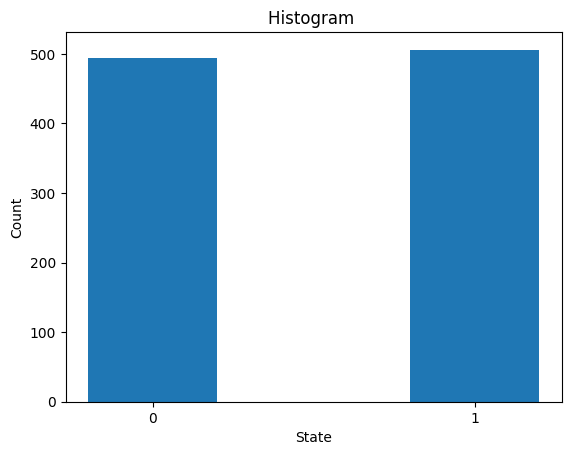

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(result, bins=[-0.2,0.2,0.8,1.2])
plt.title("Histogram ")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks([0 ,1])
plt.show()